# Flight Crash Investigation

Finding interesting trends/behaviors while analyzing and perform clustering on the dataset. (⭐️ Upvote my notebook — it helps! )

# Setting up the environment

In [109]:
import random
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py

py.init_notebook_mode(connected=True)


### 1.2. Importing dataset

In [110]:
train = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print("Train set size:", train.shape)

Train set size: (5268, 13)


### 1.3. Let's summarize the dataset

In [111]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [113]:
train.dtypes.value_counts()

object     10
float64     3
dtype: int64

In [114]:
train.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [115]:
# calculating missing values in rows
train.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# Data Cleaning and Pre-processing

### 2.1 Feature Engineering

In [116]:
train_first = train.copy()
train['Time'] = train['Time'].replace(np.nan, '00:00') ####
train['Time'] = train['Time'].str.replace('c: ', '')
train['Time'] = train ['Time'].str.replace('c:', '')
train['Time'] = train ['Time'].str.replace('c', '')
train['Time'] = train ['Time'].str.replace('12\'20', '12:20')
train['Time'] = train ['Time'].str.replace('18.40', '18:40')
train['Time'] = train ['Time'].str.replace('0943', '09:43')
train['Time'] = train ['Time'].str.replace('22\'08', '22:08')
train['Time'] = train ['Time'].str.replace('114:20', '00:00')

train.Operator = train.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'
#train['Fatalities'] = train['Fatalities'].fillna(0)
operator = train[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

C:\Users\slili\AppData\Local\Temp\ipykernel_36424\2258513469.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [117]:
# Transforming Time column to datetime format and splitting into two separate ones
time = pd.to_datetime(train['Time'], format='%H:%M')
train['hour'] = time.dt.hour
train['Year'] = train['Date'].apply(lambda x: int(str(x)[-4:]))


In [118]:
train['Survived'] = train['Aboard'] - train['Fatalities'] - train['Ground']
train['Has_Survivors'] = 1
train.loc[train['Survived'] == 0, 'Has_Survivors'] = 0

### 2.2 Plot between Fatalities and Accidents

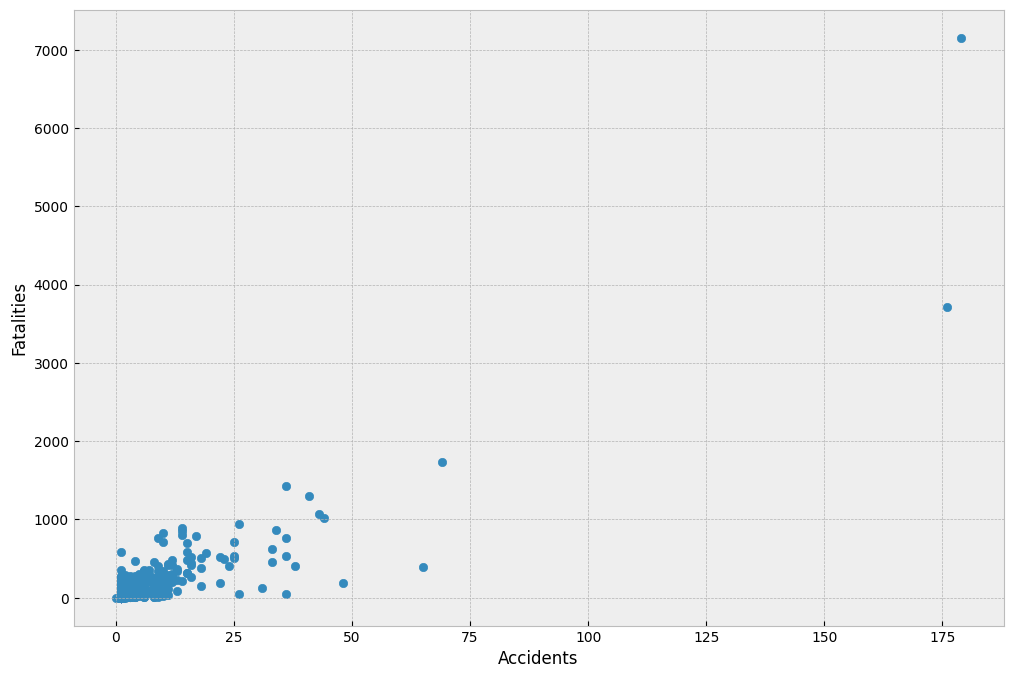

In [119]:
train['Fatalities'] = train['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

### 2.3 Fatalities percentage (For Visualization Section)

In [120]:
train_first['Fatalities_percentage'] = train['Fatalities'] / train['Aboard']
print(train_first['Fatalities_percentage'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: Fatalities_percentage, dtype: float64


In [121]:
print("Skewness: %f" % train['Fatalities'].skew())
print("Kurtosis: %f" % train['Fatalities'].kurt())

Skewness: 4.952818
Kurtosis: 42.889113


C:\Users\slili\AppData\Local\Temp\ipykernel_36424\1298984177.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\slili\AppData\Local\Temp\ipykernel_36424\1298984177.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: title={'center': 'Log Normal'}, xlabel='Fatalities'>

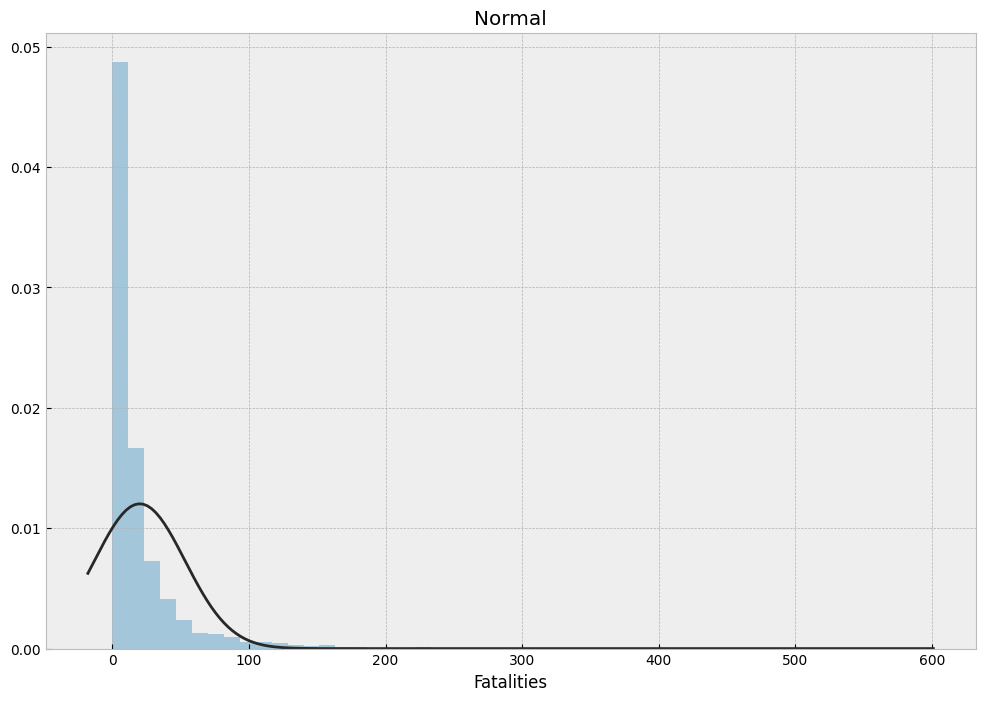

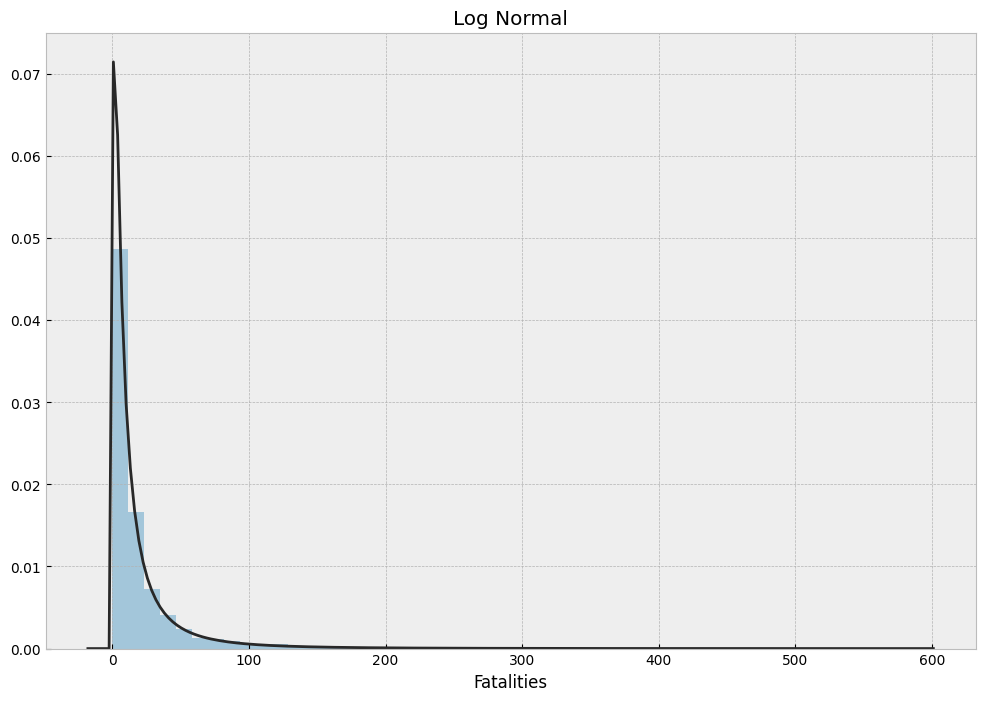

In [122]:
y = train['Fatalities']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [123]:
train["log_Fatalities"] = np.log1p(train["Fatalities"])

In [124]:
print("Skewness: %f" % train['log_Fatalities'].skew())
print("Kurtosis: %f" % train['log_Fatalities'].kurt())

Skewness: 0.339361
Kurtosis: -0.467497


In [125]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,hour,Year,Survived,Has_Survivors,log_Fatalities
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908,1.0,1,0.693147
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912,0.0,0,1.791759
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913,0.0,0,0.693147


# Data Visualization

### 3.1 Correlation among variables

C:\Users\slili\AppData\Local\Temp\ipykernel_36424\738576431.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

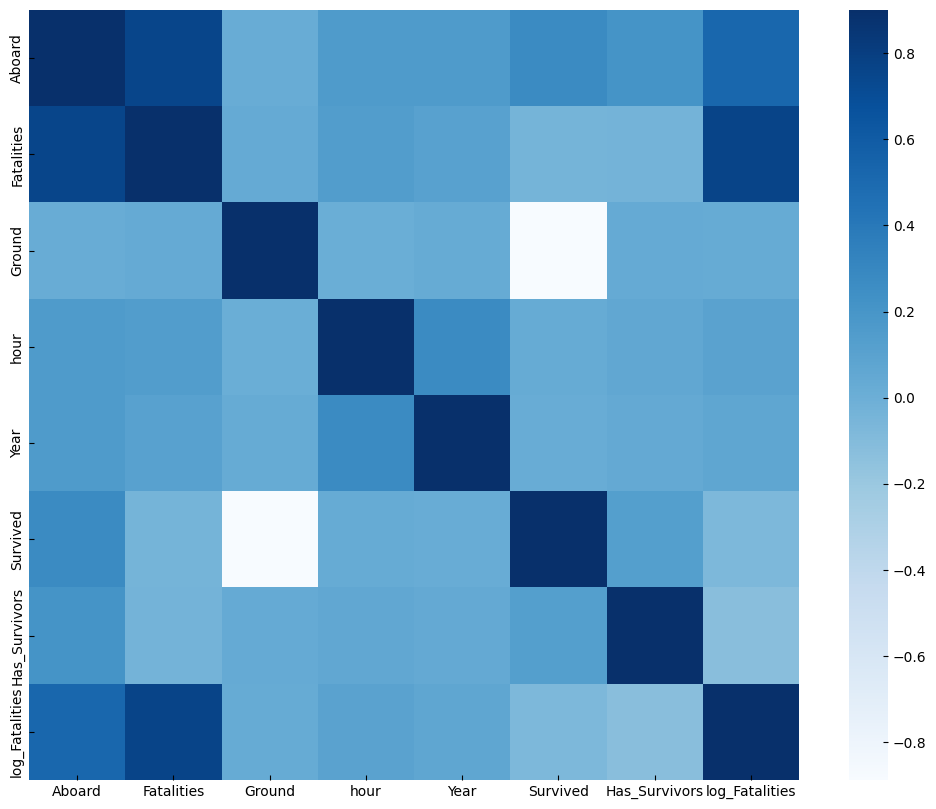

In [126]:
corr = train.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

### 3.2 Bar Graph (Fatalities per Accident & Accident with Operator)

<AxesSubplot: xlabel='Operator'>

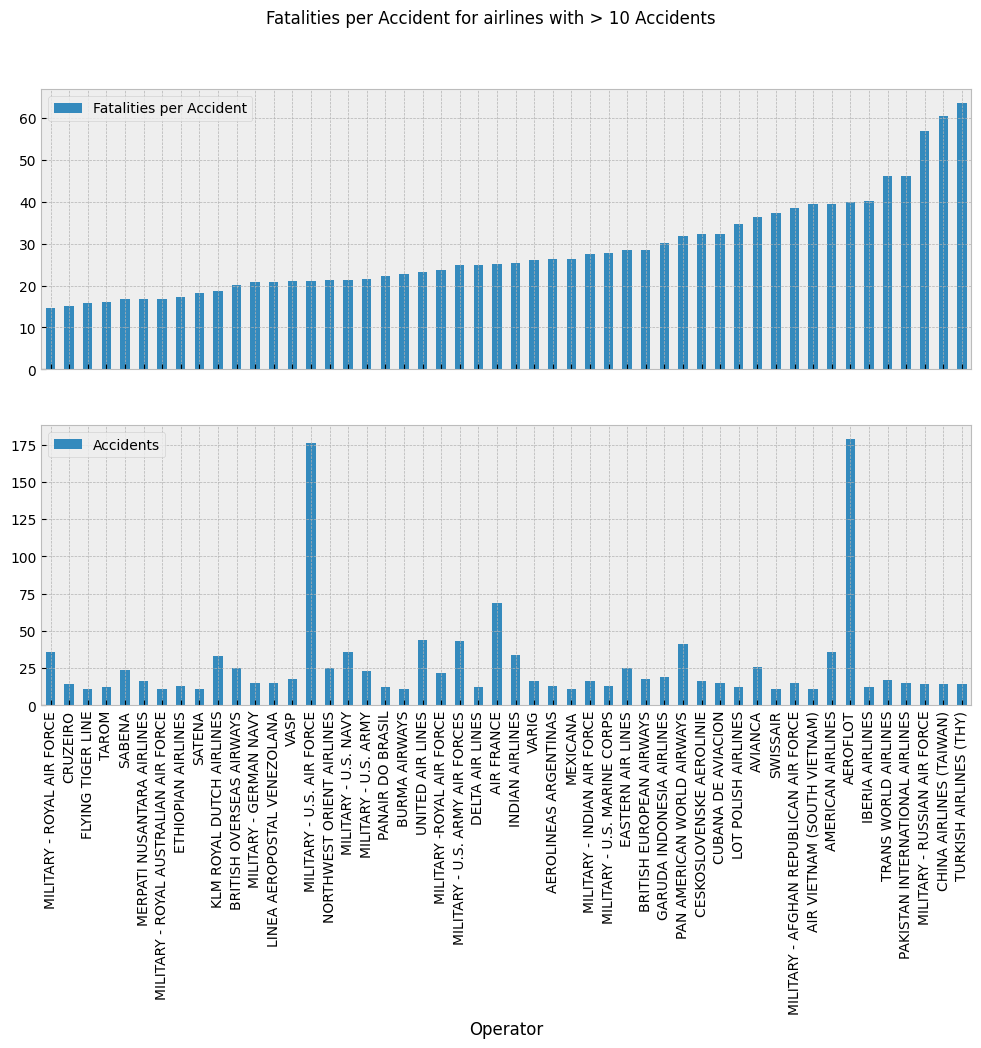

In [127]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
#Lets take a look at the proportion of fatalities per accident for specific operators.
#This bears out some interesting statistics. Thanks for the suggestion @Jos Smit.
props = operator['Fatalities'].reset_index()
props['Fatalities per Accident'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

### 3.3 Line Plot with Fatalities per Year and Accident per Year

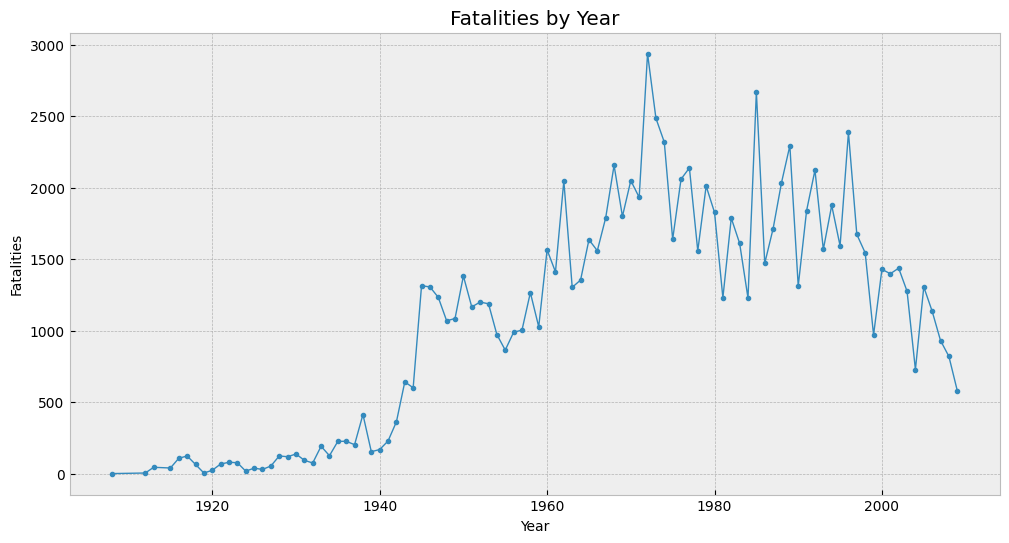

In [128]:
yearly = train[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()


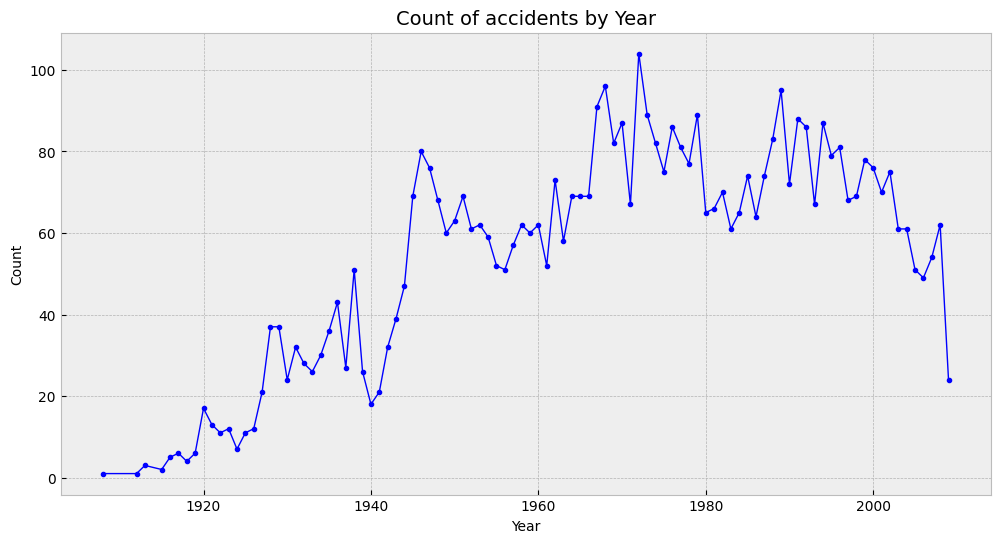

In [129]:
from datetime import date, timedelta, datetime
train_first['Time1'] = train['Date'] + ' ' + train['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
train_first['Time1'] = train_first['Time1'].apply(todate) #convert to date type

Temp = train_first.groupby(train_first.Time1.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()


70s and 80s are among the worst years for airline industry. 1972 is the worst so far, causing maximum no. of fatalities.

### 3.4 Summary wordcloud


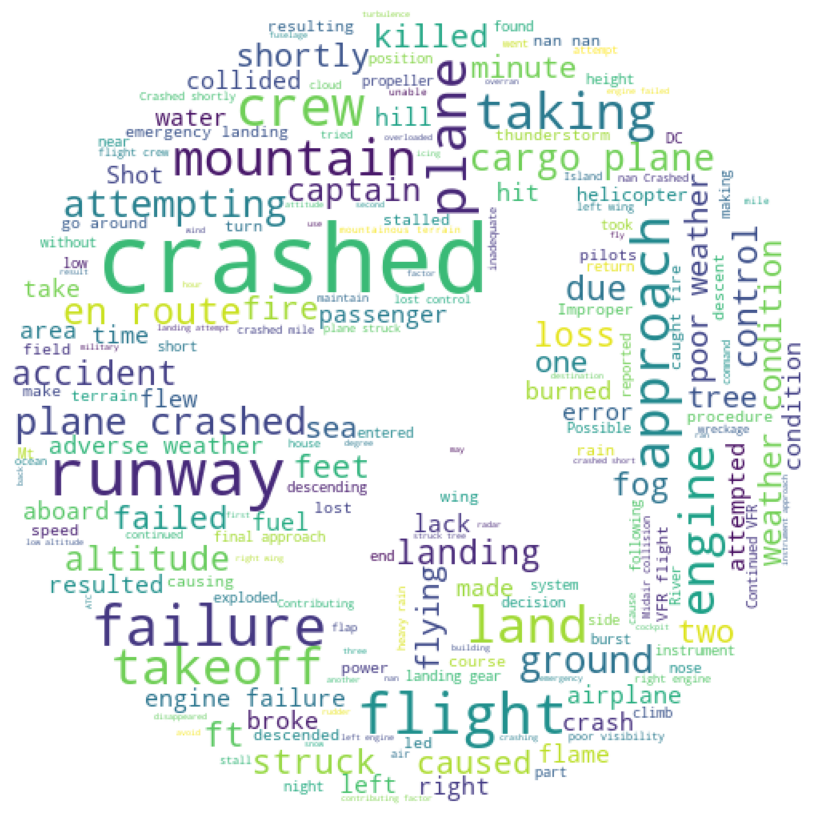

In [130]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

text = str(train.Summary.tolist())
mask = np.array(Image.open(requests.get('https://c7.uihere.com/files/303/182/469/blue-airplane-icon-vector.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

### 3.5 Location Wordcloud

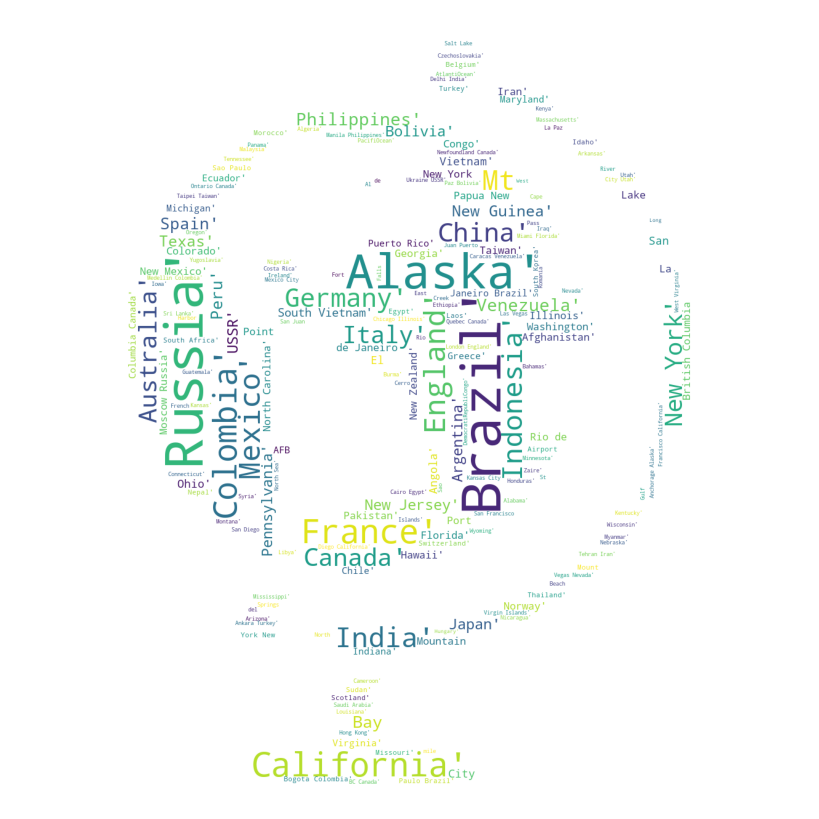

In [131]:
text = str(train.Location.tolist())
mask = np.array(Image.open(requests.get('https://previews.123rf.com/images/ahasoft2000/ahasoft20001703/ahasoft2000170301657/74074435-globe-vector-icon.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['nan', 'near' , 'island']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

### 3.7 Countries with highest number of crashed aircraft

<AxesSubplot: xlabel='Cleaned Country'>

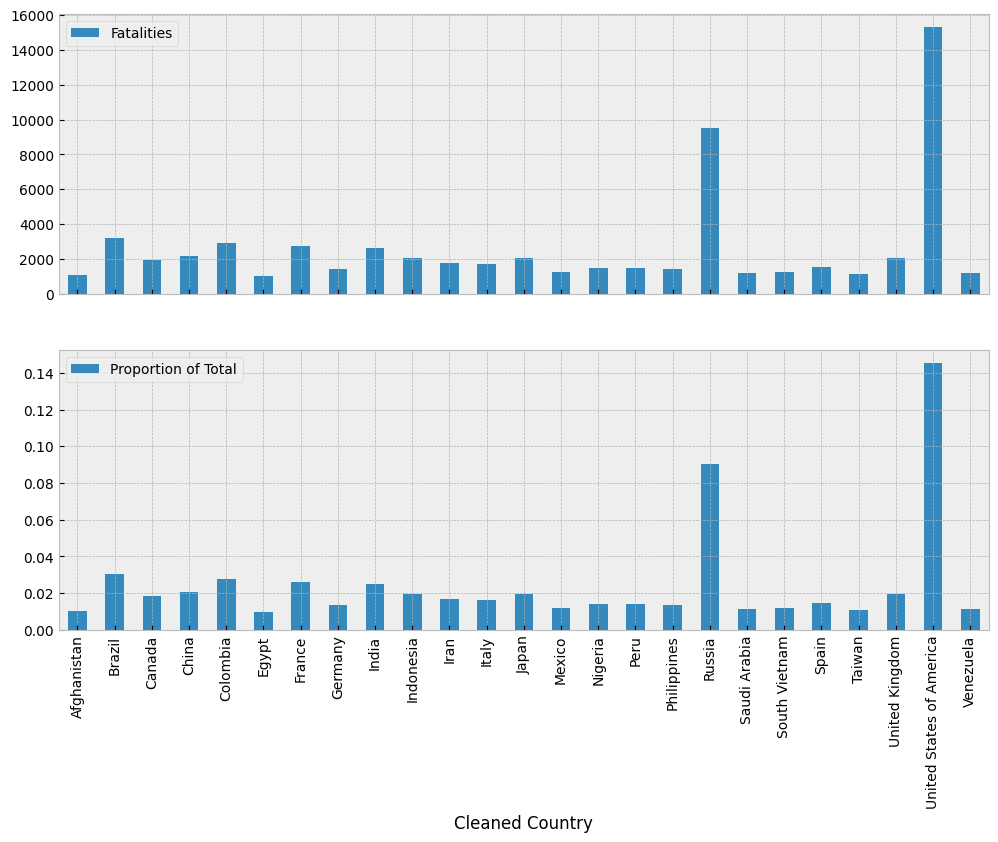

In [132]:
#Splitting out the country from the location to see if we can find some interesting statistics about where the most crashes have taken place.
fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal

s = train_first['Location'].str[0:].str.split(',', expand=True)
train_first['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()
#I've pulled out all the US states so as to be able to assign them a country

usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia''Missouri',
          'Montana', 'Mississippi','Alaska','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Alakska','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama','Alaksa' 
          ]

#Decided to try and cleanse the country names.
afNames = ['Afghanstan'] #Afghanistan
anNames = ['off Angola'] #Angola
ausNames = ['Qld. Australia','Queensland  Australia','Tasmania','off Australia'] #Australia
argNames = ['Aregntina'] #Argentina
azNames = ['Azores (Portugal)'] #Azores
baNames = ['Baangladesh'] #Bangladesh
bahNames = ['Great Inagua'] #Bahamas
berNames = ['off Bermuda'] #Bermuda
bolNames = ['Boliva','BO'] #Bolivia
bhNames = ['Bosnia-Herzegovina'] #Bosnia Herzegovina
bulNames = ['Bugaria','Bulgeria'] #Bulgaria
canNames = ['British Columbia', 'British Columbia Canada','Canada2',
            'Saskatchewan','Yukon Territory'] #Canada
camNames = ['Cameroons','French Cameroons'] #Cameroon
caNames = ['Cape Verde Islands'] #Cape Verde
chNames = ['Chili'] #Chile
coNames = ['Comoro Islands', 'Comoros Islands'] #Comoros
djNames = ['Djbouti','Republiof Djibouti'] #Djibouti
domNames = ['Domincan Republic', 'Dominica'] #Dominican Republic
drcNames = ['Belgian Congo','Belgian Congo (Zaire)','Belgium Congo'
           'DR Congo','DemocratiRepubliCogo','DemocratiRepubliCongo',
            'DemocratiRepubliof Congo','DemoctratiRepubliCongo','Zaire',
           'Zaïre'] #Democratic Republic of Congo
faNames = ['French Equitorial Africa'] #French Equatorial Africa
gerNames = ['East Germany','West Germany'] #Germany
grNames = ['Crete'] #Greece
haNames = ['Hati'] #Haiti
hunNames = ['Hunary'] #Hungary
inNames = ['Indian'] #India
indNames = ['Inodnesia','Netherlands Indies'] #Indonesia
jamNames = ['Jamacia'] #Jamaica
malNames = ['Malaya'] #Malaysia
manNames = ['Manmar'] #Myanmar
marNames = ['Mauretania'] #Mauritania
morNames = ['Morrocco','Morroco'] #Morocco
nedNames = ['Amsterdam','The Netherlands'] #Netherlands
niNames = ['Niger'] #Nigeria
philNames = ['Philipines','Philippine Sea', 'Phillipines',
            'off the Philippine island of Elalat'] #Philippines
romNames = ['Romainia'] #Romania
rusNames = ['Russian','Soviet Union','USSR'] #Russia
saNames = ['Saint Lucia Island'] #Saint Lucia
samNames = ['Western Samoa'] #Samoa
siNames = ['Sierre Leone'] #Sierra Leone
soNames = ['South Africa (Namibia)'] #South Africa
surNames = ['Suriname'] #Surinam
uaeNames = ['United Arab Emirates'] #UAE
ukNames = ['England', 'UK','Wales','110 miles West of Ireland'] #United Kingdom
uvNames = ['US Virgin Islands','Virgin Islands'] #U.S. Virgin Islands
wkNames = ['325 miles east of Wake Island']#Wake Island
yuNames = ['Yugosalvia'] #Yugoslavia
zimNames = ['Rhodesia', 'Rhodesia (Zimbabwe)'] #Zimbabwe

clnames = []
for country in train_first['Country'].values:
    if country in afNames:
        clnames.append('Afghanistan')
    elif country in anNames:
        clnames.append('Angola')
    elif country in ausNames:
        clnames.append('Australia')
    elif country in argNames:
        clnames.append('Argentina')
    elif country in azNames:
        clnames.append('Azores')
    elif country in baNames:
        clnames.append('Bangladesh')
    elif country in bahNames:
        clnames.append('Bahamas')
    elif country in berNames:
        clnames.append('Bermuda')
    elif country in bolNames:
        clnames.append('Bolivia')
    elif country in bhNames:
        clnames.append('Bosnia Herzegovina')
    elif country in bulNames:
        clnames.append('Bulgaria')
    elif country in canNames:
        clnames.append('Canada')
    elif country in camNames:
        clnames.append('Cameroon')
    elif country in caNames:
        clnames.append('Cape Verde')
    elif country in chNames:
        clnames.append('Chile')
    elif country in coNames:
        clnames.append('Comoros')
    elif country in djNames:
        clnames.append('Djibouti')
    elif country in domNames:
        clnames.append('Dominican Republic')
    elif country in drcNames:
        clnames.append('Democratic Republic of Congo')
    elif country in faNames:
        clnames.append('French Equatorial Africa')
    elif country in gerNames:
        clnames.append('Germany')
    elif country in grNames:
        clnames.append('Greece')
    elif country in haNames:
        clnames.append('Haiti')
    elif country in hunNames:
        clnames.append('Hungary')
    elif country in inNames:
        clnames.append('India')
    elif country in jamNames:
        clnames.append('Jamaica')
    elif country in malNames:
        clnames.append('Malaysia')
    elif country in manNames:
        clnames.append('Myanmar')
    elif country in marNames:
        clnames.append('Mauritania')
    elif country in morNames:
        clnames.append('Morocco')
    elif country in nedNames:
        clnames.append('Netherlands')
    elif country in niNames:
        clnames.append('Nigeria')
    elif country in philNames:
        clnames.append('Philippines')
    elif country in romNames:
        clnames.append('Romania')
    elif country in rusNames:
        clnames.append('Russia')
    elif country in saNames:
        clnames.append('Saint Lucia')
    elif country in samNames:
        clnames.append('Samoa')
    elif country in siNames:
        clnames.append('Sierra Leone')
    elif country in soNames:
        clnames.append('South Africa')
    elif country in surNames:
        clnames.append('Surinam')
    elif country in uaeNames:
        clnames.append('UAE')
    elif country in ukNames:
        clnames.append('United Kingdom')
    elif country in usNames:
        clnames.append('United States of America')
    elif country in uvNames:
        clnames.append('U.S. Virgin Islands')
    elif country in wkNames:
        clnames.append('Wake Island')
    elif country in yuNames:
        clnames.append('Yugoslavia')
    elif country in zimNames:
        clnames.append('Zimbabwe')
    else:
        clnames.append(country)
        
train_first['Cleaned Country'] = clnames        
fatalcountries = train_first[['Fatalities','Cleaned Country']].groupby(['Cleaned Country']).agg('sum')
fatalcountries.reset_index(inplace = True)
fatalcountries['Proportion of Total'] = fatalcountries['Fatalities']/totalfatal

fig_c, (ax1,ax2) = plt.subplots(2,1,sharex = True)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Fatalities'
                                                     , ax = ax1
                                                     , kind = 'bar'
                                                     , grid = True)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Proportion of Total'
                                                     , ax = ax2
                                                     , kind = 'bar'
                                                     , grid = True)

### 3.8 Trend with respect to Highest Survival Passenger in Crash by Operator

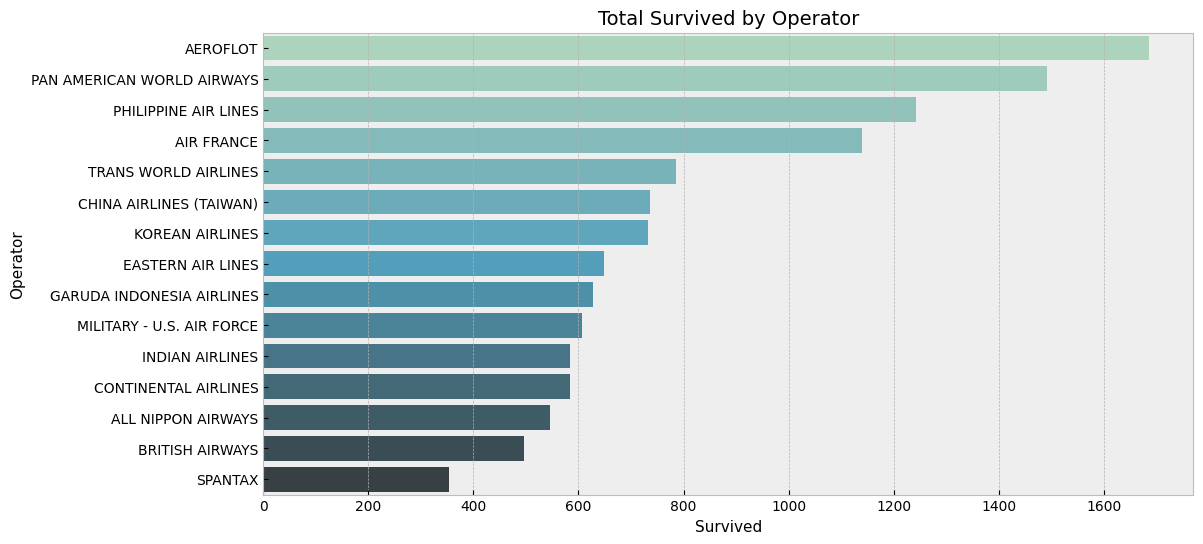

In [133]:
train1 = train.groupby('Operator')[['Survived']].sum()
train1 = train1.rename(columns={"Operator": "Survived"})
train1 = train1.sort_values(by='Survived', ascending=False)
Prop_by_OpTOP = train1.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Survived", data=Prop_by_OpTOP, palette="GnBu_d", orient='h')
plt.xlabel('Survived', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Survived by Operator', loc='Center', fontsize=14)
plt.show()

### 3.9 Fatality and Accident Trend by Worst 5 Airlines

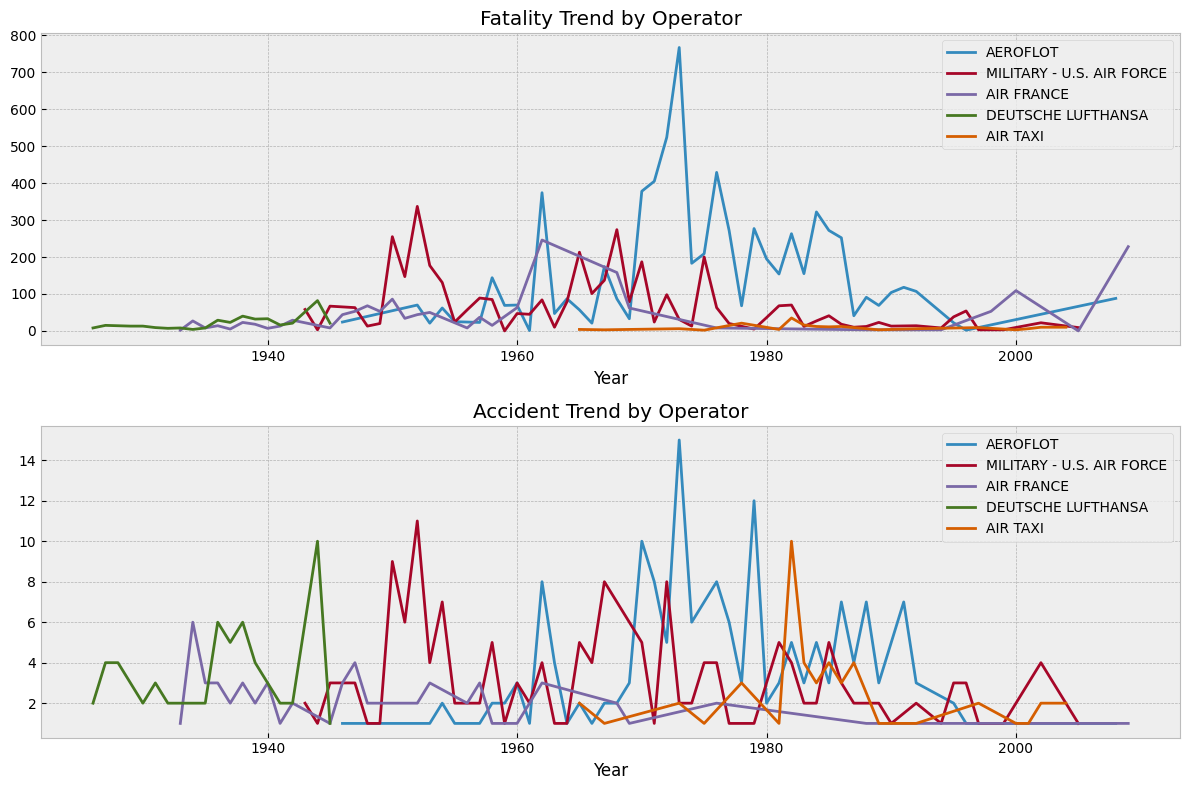

In [134]:
accidents = operator['Fatalities','count'].sort_values(ascending=False)
interestingOps = accidents.index.values.tolist()[0:5]
optrend = train[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in interestingOps:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Fatality Trend by Operator')
axtrend[1].set_title('Accident Trend by Operator')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,interestingOps)
axtrend[1].legend(linesA,interestingOps)
plt.tight_layout()

Aeroflot has the most number of accident for all the time as per dataset. PJSC Aeroflot – Russian Airlines, commonly known as Aeroflot, is the flag carrier and largest airline of the Russian Federation.

### 3.10 Countries with Highest number of Fatality Proportion

In [135]:
fatalcountries.sort_values(by='Proportion of Total', ascending=False).head(10)

,Cleaned Country,Fatalities,Proportion of Total
228,United States of America,15288.0,0.145153
181,Russia,9538.0,0.090560
30,Brazil,3205.0,0.030430
46,Colombia,2935.0,0.027867
72,France,2735.0,0.025968
98,India,2628.0,0.024952
45,China,2189.0,0.020784
227,United Kingdom,2071.0,0.019663
100,Indonesia,2050.0,0.019464
109,Japan,2050.0,0.019464


### 3.11 Bar plot of Sum of Fatalities Percentage with Worst 20 Plane Types

<AxesSubplot: xlabel='Type'>

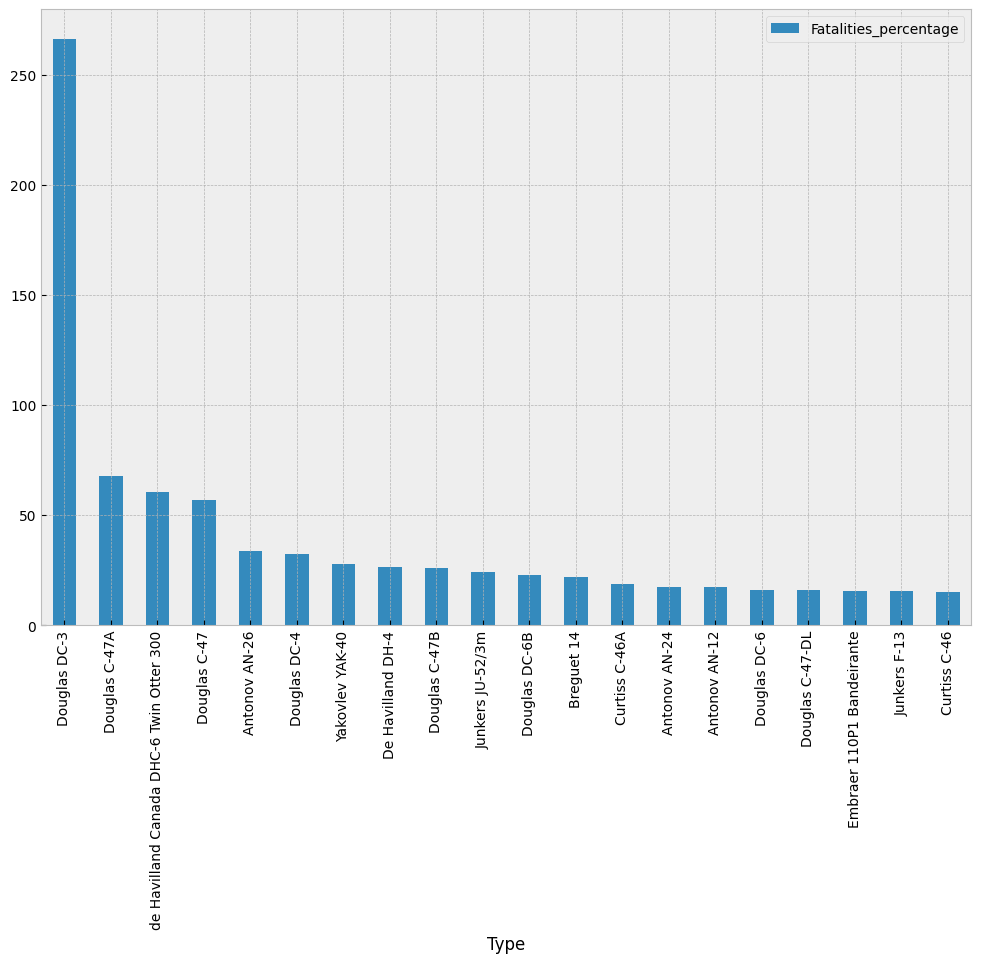

In [136]:
train_first.groupby(['Type']).agg({'Fatalities_percentage':'sum'}).sort_values(by='Fatalities_percentage',ascending=False).head(20).plot.bar()

### 3.12 Total Fatalities with Worst 7 Routes

In [137]:
route= train.groupby('Route').agg({'Fatalities':['sum',lambda x:x.sum() / train['Fatalities'].sum()]})
route.columns=route.columns.map(''.join)
route.reset_index(inplace=True)
route.rename(columns={'Fatalitiessum':'Total Fatalities','Fatalities<lambda_0>':'% of Total Fatalities'}, inplace=True)

route.sort_values(by='Total Fatalities', ascending=False).head(7)

,Route,Total Fatalities,% of Total Fatalities
2968,Tenerife - Las Palmas / Tenerife - Las Palmas,583.0,0.005527
3012,Tokyo - Osaka,557.0,0.005281
3029,Training,457.0,0.004333
2276,Paris - London,375.0,0.003555
2057,New Delhi - Dhahran / Chimkent - New Delhi,349.0,0.003309
1957,Montreal - London,329.0,0.003119
2522,Riyadh - Jeddah,301.0,0.002854


3 worst routes with Location :-

Canary Islands and Japan have the highest no. of fatalities. 'Training' is the 3rd highest Route for crash.

### 3.13 Top 10 the most dangerous locations

In [138]:
from collections import Counter
loc_list = Counter(train['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


# Important Conclusions & Learnings


1. Don't fly with Aeroflot, there is 68% chance of you dying.
2. Don't fly in a Douglas DC-3, you are 5 times more probale to die.
3. Don't take any flight that flies over canary Islands or Japan.
4. Don't fly with any flight of type Douglous DC-3 ,it had highest fatalities percentage.
5. Avoid going to Sao Paulo, Brazil	; Moscow, Russia ; Rio de Janeiro, Brazil ; they had highest plane crash location.
6. It is so much safer to take flight now-a-days as compared to 1970-80, 1972 was the worst years for airline industry.